# Theory/Computation Problems

### Problem 1 (20 points) 
Show that the stationary point (zero gradient) of the function
$$
\begin{aligned}
    f=2x_{1}^{2} - 4x_1 x_2+ 1.5x^{2}_{2}+ x_2
\end{aligned}
$$
is a saddle (with indefinite Hessian). Find the directions of downslopes away from the saddle. Hint: Use Taylor's expansion at the saddle point. Find directions that reduce $f$. <br />

### Answer:
#### a.
We can first find the Hessian of $f$: <br />
$g = \begin{bmatrix} \frac{\partial f}{\partial x_1} \\ \frac{\partial f}{\partial x_2} \end{bmatrix} =\begin{bmatrix}4x_1-4x_2 \\ -4x_1 +3x_2 + 1 \end{bmatrix}$ <br />
$H = \begin{bmatrix} \frac{\partial^2f}{\partial x_1^2} & \frac{\partial^2f}{\partial x_1x_2} \\ \frac{\partial^2 f}{\partial x_2 x_1} & \frac{\partial^2f}{\partial x_2^2}\end{bmatrix} = \begin{bmatrix} 4 & -4 \\ -4 & 3 \end{bmatrix}$ <br />
The eigenvalues of $H$ are 7.531 and -0.531 obtained by following code, therefore, the Hessian matrix is indefinite (as $\lambda_1 > 0 $ and $\lambda_2 <0$)

In [17]:
import numpy as np
A = np.array([[4.,-4.0],[-4.0, 3.0]])
eigv, _ = np.linalg.eig(A)
print(eigv)

[ 7.53112887 -0.53112887]


Since we have $\lambda_1 > 0$ and $\lambda_2<0$, the Hessian matrix is indefinite, therefore the stationary point is a saddle.

#### b.
For stationary point, we have $\nabla f(x)=0 \rightarrow g(x1, x_2)=\begin{bmatrix}4x_1-4x_2 \\ -4x_1 +3x_2 + 1 \end{bmatrix} = 0$, therefore the stationary point $s_p=(1,1)$. <br />
For Taylor expansion about the stationary point, we have:<br />
$f(x) = 0.5 + \frac{1}{2}\begin{bmatrix} x_1 - 1 \\ x_2 -1\end{bmatrix}\begin{bmatrix}4 & -4 \\ -4 & 3\end{bmatrix}\begin{bmatrix} x_1-1 & x_2-1 \end{bmatrix}$ <br />
where $\frac{1}{2}\begin{bmatrix} x_1 - 1 \\ x_2 -1\end{bmatrix}\begin{bmatrix}4 & -4 \\ -4 & 3\end{bmatrix}\begin{bmatrix} x_1-1 & x_2-1 \end{bmatrix} = (2x_1-3x_2+1)(2x_1-x_2-1)<0$ <br />
To satisfy this, we must have following for the downslopes:<br />
$\forall x_1, x_2: 2x_1-3x_2 < -1$ and $2x_1 - x_2 > -1$ Or <br />
$\forall x_1, x_2: 2x_1-3x_2 > -1$ and $2x_1 - x_2 < -1$

### Problem 2 (50 points)

* (10 points) Find the point in the plane $x_1+2x_2+3x_3=1$ in $\mathbb{R}^3$ that is nearest to the point $(-1,0,1)^T$. Is this a convex problem? Hint: Convert the problem into an unconstrained problem using $x_1+2x_2+3x_3=1$.
#### a.
To find the $x \in \mathcal{R}^3$ nearest to $(-1, 0, 1)^T$, we have following object function <br />
$min_{x_1,x_2,x_3}{(x_1+1)^2+x_2^2+(x_3-1)^2}$ <br />
s.t $x_1+2x_2+3x_3=1$ <br />
To simplify the object function, we can replace $x_1$ by $1-2x_2-3x_3$:<br />
$min_{x_2,x_3}{(2-2x_2-3x_3)^2+x_2^2+(x_3-1)^2}$ <br />
We have $\nabla f = \begin{bmatrix} -8+10x_2+12x_3 \\  -14 + 12x_2 +20x_3\end{bmatrix}$ <br />
The Hessian matrix: <br />
$H = \begin{bmatrix} 10 & 12 \\ 12 & 20 \end{bmatrix}$ with eigenvalues $\lambda_1 =2$ and $\lambda_2=20$, which is positive define.
Therefore the stationary point is the local minimum, so the nearest point is when $\nabla f = 0$, which is following:<br />
$\begin{bmatrix}x_1 \\ x_2 \\x_3 \end{bmatrix} = \begin{bmatrix} -1.0715\\ -0.1428 \\ 0.7857\end{bmatrix}$
* (40 points) Implement the gradient descent and Newton's algorithm for solving the problem. Attach your codes along with a short summary including (1) the initial points tested, (2) corresponding solutions, (3) a log-linear convergence plot.

#### b. Part 1  gradient descent methods

x_1:-1.0715,x_2:-0.1428,x_3:0.7857


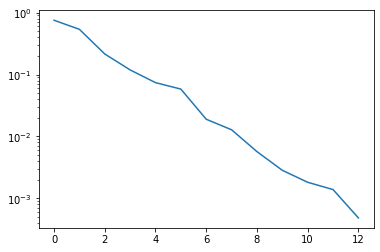

In [1]:
import numpy as np
from matplotlib import pyplot as plt
fun_grad = lambda x: np.array([-8 + 10*x[0] + 12*x[1], -14+12*x[0]+20*x[1]])
fun_obj = lambda x: ((1-2*x[0]-3*x[1])+1)**2 + (x[0])**2 + (x[1]-1)**2
x = np.array([1, 1]) # initial guess
x_ = np.array([-0.1428,  0.7857])

epsilon = 100
diff_l = []
diff = 100

def amijo(x):
    a = 1
    while fun_obj(x-a*fun_grad(x)) > fun_obj(x)-a*(0.5)*np.matmul(fun_grad(x), fun_grad(x)):
        a=.5*a
    return a

while diff > 0.001:

    a = amijo(x)
    x = x - a * fun_grad(x)
    diff = abs(fun_obj(x) - fun_obj(x_))
    diff_l.append(diff)

plt.plot(diff_l)
plt.yscale("log")
print('x_1:{},x_2:{},x_3:{}'.format(1-2*x_[0]-3*x_[1], x_[0], x_[1]))

The initial point is $[1,1]$ and the corresponding solution is $\begin{bmatrix}x_1 \\ x_2 \\x_3 \end{bmatrix} = \begin{bmatrix} -1.0715\\ -0.1428 \\ 0.7857\end{bmatrix}$
#### b. Part 2  Newton's algorithm

x_1:-1.0715,x_2:-0.1428,x_3:0.7857


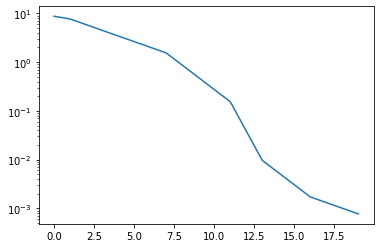

In [3]:
from matplotlib import pyplot as plt
import numpy as np
H = np.array([[10,12],[12,20]])
fun_grad = lambda x: np.array([-8 + 10*x[0]+12*x[1], -14+12*x[0] + 20*x[1]])
fun_obj = lambda x: ((1 - 2*x[0] - 3*x[1]) + 1)**2 + (x[0])**2 + (x[1] - 1)**2
x = np.array([1, 1]) # initial guess
x_ = np.array([-0.1428,  0.7857])

epsilon = 100
diff_l = []
diff = 100

def amijo(x):
    a = 1
    while fun_obj(x - a*fun_obj(x)) > fun_obj(x)-a*(0.5)*np.matmul(fun_grad(x), np.matmul(np.linalg.inv(H), fun_grad(x))):
        a = 0.5*a
    return a

while diff > 0.001:

    a = amijo(x)
    x = x-a*np.matmul(np.linalg.inv(H), fun_grad(x))
    diff = abs(fun_obj(x) - fun_obj(x_))
    diff_l.append(diff)

plt.plot(diff_l)
plt.yscale("log")
print('x_1:{},x_2:{},x_3:{}'.format(1-2*x_[0]-3*x_[1], x_[0], x_[1]))

The initial point is $[1,1]$ and the corresponding solution is $\begin{bmatrix}x_1 \\ x_2 \\x_3 \end{bmatrix} = \begin{bmatrix} -1.0715\\ -0.1428 \\ 0.7857\end{bmatrix}$

### Problem 3 (10 points) 
Let $f(x)$ and $g(x)$ be two convex functions defined on the convex set $\mathcal{X}$. 
* (5 points) Prove that $af(x)+bg(x)$ is convex for $a>0$ and $b>0$. 
#### a.
Let $x = \lambda x_1 + (1-\lambda)x_2$ and $F(x)=af(x)+bg(x)$, if $F(x)$ is convex function, we have <br />
$F(\lambda_1 x_1 +(1-\lambda_1)x_2) \leq \lambda_1 F(x_1)+(1-\lambda_1)F(x_2)$ <br />
$af(\lambda_1 x_1 +(1-\lambda_1)x_2) + bg(\lambda_1 x_1 +(1-\lambda_1)x_2) \leq a\lambda_1 f(x1) + b \lambda_1 g(x_1) + a(1-\lambda_1) f(x2) + b (1-\lambda_1) g(x_2) $
Since f(x) and g(x) is convex function, therefore it's always true that<br />
$f(\lambda_1 x_1 +(1-\lambda_1)x_2) \leq \lambda_1 f(x1) + (1-\lambda_1) f(x2)$ and <br />
$g(\lambda_1 x_1 +(1-\lambda_1)x_2) \leq \lambda_1 g(x1) + (1-\lambda_1) g(x2)$ <br/>
Since $a > 0$ and $b > 0$, we have following meets: <br />
$af(\lambda_1 x_1 +(1-\lambda_1)x_2) \leq a\lambda_1 f(x1) + a(1-\lambda_1) f(x2)$ and <br />
$bg(\lambda_1 x_1 +(1-\lambda_1)x_2) \leq b\lambda_1 g(x1) + b(1-\lambda_1) g(x2)$ <br/>
Hence it is always true that: <br />
$af(\lambda_1 x_1 +(1-\lambda_1)x_2) + bg(\lambda_1 x_1 +(1-\lambda_1)x_2) \leq a\lambda_1 f(x1) + b \lambda_1 g(x_1) + a(1-\lambda_1) f(x2) + b (1-\lambda_1) g(x_2) $ <br />
Therefore $F(x)$ is convex function, which means $af(x)+bg(x)$ is convex for $a>0$ and $b>0$.

* (5 points) In what conditions will $f(g(x))$ be convex?
#### b.
If g(x) is convex, we have: <br />
$g(\lambda x_1 + (1-\lambda)x_2) \leq \lambda g(x_1) + (1 - \lambda)g(x_2)$ <br />
If $f(x)$ is non-decreasing, we have: <br />
$f(g(\lambda x_1 + (1-\lambda)x_2)) \leq f(\lambda g(x_1) + (1 - \lambda)g(x_2))$ <br />
where $f(\lambda g(x_1) + (1 - \lambda)g(x_2)) \leq \lambda f(g(x_1)) + (1 - \lambda)f(g(x_2))$,<br />
Hence we have $f(g(x))$ is convex when $g(x)$ is convex and $f(x)$ is non-decreasing

### Problem 4 (bonus 10 points)
Show that $f({\bf x}_1) \geq f(\textbf{x}_0) +\textbf{g}_{\textbf{x}_0}^T(\textbf{x}_1-\textbf{x}_0)$ for a convex function $f(\textbf{x}): \mathcal{X} \rightarrow \mathbb{R}$ and for $\textbf{x}_0$, $\textbf{x}_1 \in \mathcal{X}$.


# Design Problems

### Problem 5 (20 points) 
Consider an illumination problem: There are $n$ lamps and $m$ mirrors fixed to the ground. The target reflection intensity level is $I_t$. The actual reflection intensity level on the $k$th mirror can be computed as $\textbf{a}_k^T \textbf{p}$, where $\textbf{a}_k$ is given by the distances between all lamps to the mirror, and $\textbf{p}:=[p_1,...,p_n]^T$ are the power output of the lamps. The objective is to keep the actual intensity levels as close to the target as possible by tuning the power output $\textbf{p}$.

* (5 points) Formulate this problem as an optimization problem. 
* (5 points) Is your problem convex?
* (5 points) If we require the overall power output of any of the $n$ lamps to be less than $p^*$, will the problem have a unique solution?
* (5 points) If we require no more than half of the lamps to be switched on, will the problem have a unique solution?

# Note

For this homework, you may want to attach sketches as means to explain your ideas. Here is how you can attach images.

![everly1](img/everly7.jpg)

In [ ]:
import